# Regressão Linear - Predição da Idade


### importar bibliotecas


In [484]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv


In [485]:
train = pd.read_csv('titanic/train.csv')

In [486]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index


In [487]:
train.set_index('PassengerId', inplace=True)

In [488]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois


In [489]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set


In [490]:
test['Survived'] = np.nan

### Conferir shape novamente


In [491]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set


In [492]:
data = pd.concat([train, test], sort=False)

In [493]:
data.shape

(1309, 11)

### Averiguar dados nulos


In [494]:
data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Remover Cabine


In [495]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [496]:
data.drop('Cabin', axis=1, inplace=True)

### Checar dados nulos novamente


In [497]:
data.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda


In [498]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [499]:
mode = data['Embarked'].mode()[0]

In [500]:
data['Embarked'].fillna(mode, inplace=True)

/tmp/ipykernel_8129/3557902452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(mode, inplace=True)


### Checar dados nulos novamente


In [501]:
data.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      0
dtype: int64

### Preencher "Tarifa" faltando com a média


In [502]:
mean = round(data['Fare'].mean(), 4)
mean

33.2955

In [503]:
data['Fare'].fillna(mean, inplace=True)

/tmp/ipykernel_8129/722131707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(mean, inplace=True)


### Checar dados nulos


In [504]:
data.isna().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### Verificar correlações


In [505]:
data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Fare,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"


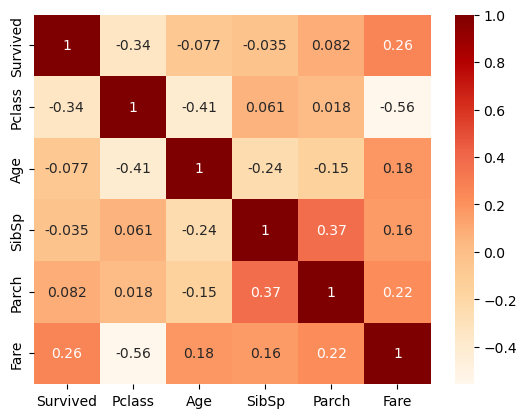

In [506]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
            annot=True, cmap='OrRd')
plt.show()

### Remover coluna "Sobreviveu"

Aparentemente não tem muita correlação com Idade, e está faltando bastante dados


In [507]:
data.drop('Survived', axis=1, inplace=True)

### Checar dados nulos


In [508]:
data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

# Engenharia de Recursos I


### Criar coluna "Titulo" baseando-se na coluna "Nome"


In [509]:
data['Title'] = data['Name'].str.extract(r'([a-zA-Z]+)\.')

In [510]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [511]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [512]:
data['Title'] = data['Title'].apply(lambda x: 'Others' if x not in [
                                    'Miss', 'Master', 'Mr', 'Mrs'] else x)

In [513]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,260,0
Mr,0,757
Mrs,197,0
Others,9,25


### Averiguar informações do DataFrame


In [514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Title     1309 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"


In [515]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [516]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

# Engenharia de Recursos II


### Estudar possibilidade de identificar "meninas" similar aos "meninos"

Através da combinação: "solteira" e está com "pais"


In [517]:
single_with_parents = data.loc[(
    data['Title'] == 'Miss') & (data['Parch'] >= 1)]
single_with_parents

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
11,3,female,4.00,1,1,16.7000,S,Miss
25,3,female,8.00,3,1,21.0750,S,Miss
44,2,female,3.00,1,2,41.5792,C,Miss
59,2,female,5.00,1,2,27.7500,S,Miss
69,3,female,17.00,4,2,7.9250,S,Miss
...,...,...,...,...,...,...,...,...
1218,2,female,12.00,2,1,39.0000,S,Miss
1246,3,female,0.17,1,2,20.5750,S,Miss
1277,2,female,24.00,1,2,65.0000,S,Miss


### idade média de "meninas solteiras acompanhadas dos pais"


In [518]:
single_with_parents['Age'].mean()

12.178815789473685

### verificar distribuição da idade


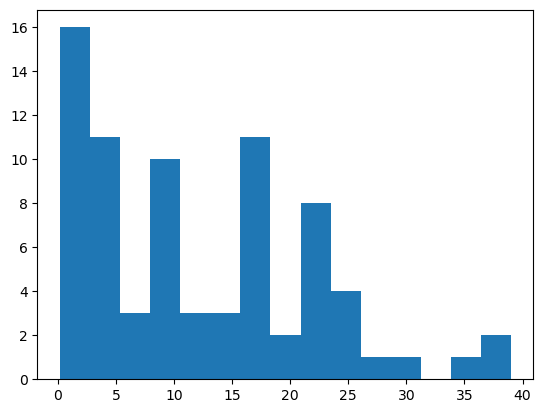

In [519]:
plt.hist(single_with_parents['Age'], bins=15)
plt.show()

### Média de mulheres "solteiras"


In [520]:
data.loc[data['Title'] == 'Miss']['Age'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"


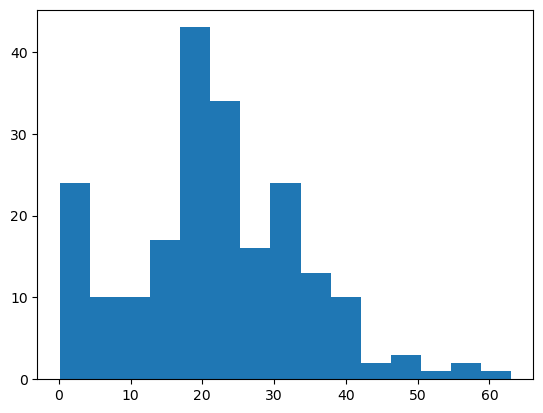

In [521]:
plt.hist(data.loc[data['Title'] == 'Miss']['Age'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"


In [522]:
data.loc[data['Title'] == 'Mrs']['Age'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"


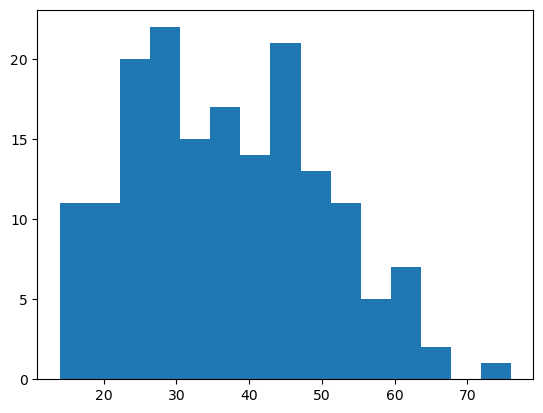

In [523]:
plt.hist(data.loc[data['Title'] == 'Mrs']['Age'], bins=15)
plt.show()

### Adicionar coluna "solteira com pais"


In [524]:
single_with_parents.index

Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,  173,
        181,  185,  206,  230,  234,  238,  298,  312,  319,  330,  342,  357,
        375,  382,  410,  418,  420,  436,  437,  447,  449,  470,  480,  486,
        531,  536,  540,  541,  542,  543,  581,  586,  594,  616,  619,  635,
        643,  645,  652,  690,  692,  703,  721,  743,  751,  793,  814,  836,
        853,  854,  864,  889,  918,  944,  945, 1009, 1017, 1032, 1067, 1078,
       1080, 1095, 1106, 1130, 1142, 1155, 1175, 1176, 1188, 1218, 1246, 1277,
       1294, 1301],
      dtype='int64', name='PassengerId')

In [525]:
data['SingleWithParents'] = 0

In [526]:
for idx, _ in data.iterrows():
    if idx in single_with_parents.index:
        data['SingleWithParents'].at[idx] = 1

In [527]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'SingleWithParents'],
      dtype='object')

In [528]:
data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SingleWithParents']
     ].loc[data['SingleWithParents'] == 1].mean()

Pclass                2.302326
Age                  12.178816
SibSp                 1.686047
Parch                 1.523256
Fare                 51.192345
SingleWithParents     1.000000
dtype: float64

In [529]:
data.loc[data['SingleWithParents'] == 1]['Age'].mean()

12.178815789473685

In [530]:
data.loc[data['SingleWithParents'] == 0]['Age'].mean()

31.26812371134021

### Transformar recursos categóricos em "dummies"


In [531]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SingleWithParents
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr,0
2,1,female,38.0,1,0,71.2833,C,Mrs,0
3,3,female,26.0,0,0,7.9250,S,Miss,0
4,1,female,35.0,1,0,53.1000,S,Mrs,0
5,3,male,35.0,0,0,8.0500,S,Mr,0


In [532]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [533]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SingleWithParents
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,Mr,0
2,1,1,38.0,1,0,71.2833,C,Mrs,0
3,3,1,26.0,0,0,7.9250,S,Miss,0
4,1,1,35.0,1,0,53.1000,S,Mrs,0
5,3,0,35.0,0,0,8.0500,S,Mr,0


In [534]:
data = pd.get_dummies(
    data, columns=['Pclass', 'Embarked', 'Title'], drop_first=True)

In [535]:
data.head()

,Sex,Age,SibSp,Parch,Fare,SingleWithParents,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,False,True,False,True,False,True,False,False
2,1,38.0,1,0,71.2833,0,False,False,False,False,False,False,True,False
3,1,26.0,0,0,7.9250,0,False,True,False,True,True,False,False,False
4,1,35.0,1,0,53.1000,0,False,False,False,True,False,False,True,False
5,0,35.0,0,0,8.0500,0,False,True,False,True,False,True,False,False


In [536]:
data.shape

(1309, 14)

### Separar train e test para idades

- treinar com dados não nulos
- aplicar modelo em dados nulos


In [537]:
data.isnull().sum()

Sex                    0
Age                  263
SibSp                  0
Parch                  0
Fare                   0
SingleWithParents      0
Pclass_2               0
Pclass_3               0
Embarked_Q             0
Embarked_S             0
Title_Miss             0
Title_Mr               0
Title_Mrs              0
Title_Others           0
dtype: int64

In [538]:
train_age = data.dropna()

In [539]:
test_age = data.loc[data['Age'].isnull()]

In [540]:
train_age.head()

,Sex,Age,SibSp,Parch,Fare,SingleWithParents,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,False,True,False,True,False,True,False,False
2,1,38.0,1,0,71.2833,0,False,False,False,False,False,False,True,False
3,1,26.0,0,0,7.9250,0,False,True,False,True,True,False,False,False
4,1,35.0,1,0,53.1000,0,False,False,False,True,False,False,True,False
5,0,35.0,0,0,8.0500,0,False,True,False,True,False,True,False,False


In [541]:
test_age.head()

,Sex,Age,SibSp,Parch,Fare,SingleWithParents,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,,,,,,,,,,
6,0,NaN,0,0,8.4583,0,False,True,True,False,False,True,False,False
18,0,NaN,0,0,13.0000,0,True,False,False,True,False,True,False,False
20,1,NaN,0,0,7.2250,0,False,True,False,False,False,False,True,False
27,0,NaN,0,0,7.2250,0,False,True,False,False,False,True,False,False
29,1,NaN,0,0,7.8792,0,False,True,True,False,True,False,False,False


In [542]:
test_age.drop('Age', axis=1, inplace=True)

/tmp/ipykernel_8129/3972772101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_age.drop('Age', axis=1, inplace=True)


In [543]:
test_age.head()

,Sex,SibSp,Parch,Fare,SingleWithParents,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,,,,,,,,,
6,0,0,0,8.4583,0,False,True,True,False,False,True,False,False
18,0,0,0,13.0000,0,True,False,False,True,False,True,False,False
20,1,0,0,7.2250,0,False,True,False,False,False,False,True,False
27,0,0,0,7.2250,0,False,True,False,False,False,True,False,False
29,1,0,0,7.8792,0,False,True,True,False,True,False,False,False


In [544]:
train_age.shape, test_age.shape

((1046, 14), (263, 13))

## Definir X e y para treinar o modelo


In [545]:
X = train_age.drop('Age', axis=1)

In [546]:
y = train_age['Age']

In [547]:
X.shape, y.shape

((1046, 13), (1046,))

### Importar modelo regressivo


In [548]:
from sklearn import linear_model

### Instanciar modelo


In [549]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino


In [550]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar


In [551]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123)

### Treinar modelo


In [552]:
X_train.shape, y_train.shape

((732, 13), (732,))

In [553]:
lm.fit(X_train, y_train)

LinearRegression()

In [554]:
X_test.shape, y_test.shape

((314, 13), (314,))

### Fazer predição


In [555]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)


In [556]:
from sklearn.metrics import mean_squared_error

### Averiguar score


In [557]:
lm.score(X_test, y_test)

0.4827170433070086

### Averiguar rmse


In [558]:
mse = mean_squared_error(y_test, pred)
mse

106.96012816930894

In [559]:
rmse = np.sqrt(mse)
rmse

10.342152975532171

### Visualizar resíduos em scatterplot


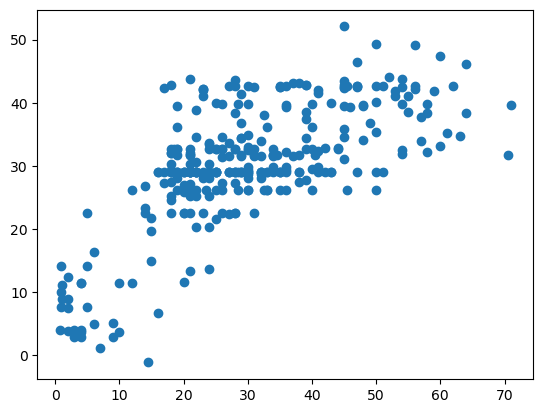

In [560]:
plt.scatter(y_test, pred)
plt.show()

<a name="tarifa"></a>


### Aplicar modelo nos dados nulos


In [561]:
test_age.shape

(263, 13)

In [562]:
pred_age = lm.predict(test_age)

In [563]:
pred_age.shape

(263,)

### Criar coluna Idade contendos as predições


In [564]:
test_age['Age'] = pred_age

/tmp/ipykernel_8129/824399524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_age['Age'] = pred_age


In [565]:
test_age.isnull().sum()

Sex                  0
SibSp                0
Parch                0
Fare                 0
SingleWithParents    0
Pclass_2             0
Pclass_3             0
Embarked_Q           0
Embarked_S           0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Others         0
Age                  0
dtype: int64

### Averiguar shapes


In [566]:
test_age.shape, train_age.shape

((263, 14), (1046, 14))

### Concatenar dados


In [567]:
age = pd.concat([test_age, train_age], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"


In [568]:
age.isnull().sum()

Sex                  0
SibSp                0
Parch                0
Fare                 0
SingleWithParents    0
Pclass_2             0
Pclass_3             0
Embarked_Q           0
Embarked_S           0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Others         0
Age                  0
dtype: int64

In [569]:
age.shape

(1309, 14)

In [570]:
complete_age = pd.DataFrame(
    {
        'PassengerId': age.index,
        'Age': age['Age']
    }
)

In [571]:
complete_age.head()

,PassengerId,Age
PassengerId,,
6,6,31.670015
18,18,32.641780
20,20,27.483593
27,27,26.219080
29,29,25.138503


### Salvar CSV com idade completa


In [572]:
complete_age.to_csv('complete_age.csv', index=False)

In [573]:
data_age = pd.read_csv('complete_age.csv')

In [574]:
data_age.head()

,PassengerId,Age
0,6,31.670015
1,18,32.641780
2,20,27.483593
3,27,26.219080
4,29,25.138503
